In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [3]:
# Dataset Configuration
BASE_DIR = 'archive'
IMAGE_DIRS = {
    'part1': 'imgs_part_1/imgs_part_1',
    'part2': 'imgs_part_2/imgs_part_2', 
    'part3': 'imgs_part_3/imgs_part_3'
}
METADATA_FILE = 'metadata.csv'



In [5]:
df = pd.read_csv(os.path.join(BASE_DIR, METADATA_FILE))

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
df.head()


Dataset shape: (2298, 26)
Columns: ['patient_id', 'lesion_id', 'smoke', 'drink', 'background_father', 'background_mother', 'age', 'pesticide', 'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water', 'has_sewage_system', 'fitspatrick', 'region', 'diameter_1', 'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed', 'elevation', 'img_id', 'biopsed']

First few rows:


patient_id  lesion_id  smoke  drink background_father background_mother  \
0   PAT_1516       1765    NaN    NaN               NaN               NaN   
1     PAT_46        881  False  False         POMERANIA         POMERANIA   
2   PAT_1545       1867    NaN    NaN               NaN               NaN   
3   PAT_1989       4061    NaN    NaN               NaN               NaN   
4    PAT_684       1302  False   True         POMERANIA         POMERANIA   

   age pesticide  gender skin_cancer_history  ... diameter_2 diagnostic  \
0    8       NaN     NaN                 NaN  ...        NaN        NEV   
1   55     False  FEMALE                True  ...        5.0        BCC   
2   77       NaN     NaN                 NaN  ...        NaN        ACK   
3   75       NaN     NaN                 NaN  ...        NaN        ACK   
4   79     False    MALE                True  ...        5.0        BCC   

    itch   grew   hurt  changed  bleed elevation                 img_id  \
0  FALSE  FALSE  FALSE    FALSE  FALSE     FALSE  PAT_1516_1765_530.png   
1   TRUE   TRUE  FALSE     TRUE   TRUE      TRUE     PAT_46_881_939.png   
2   TRUE  FALSE  FALSE    FALSE  FALSE     FALSE  PAT_1545_1867_547.png   
3   TRUE  FALSE  FALSE    FALSE  FALSE     FALSE  PAT_1989_4061_934.png   
4   TRUE   TRUE  FALSE    FALSE   TRUE      TRUE   PAT_684_1302_588.png   

  biopsed  
0   False  
1    True  
2   False  
3   False  
4    True  

[5 rows x 26 columns]

In [6]:
print(f"Total samples: {len(df)}")
print(f"Unique patients: {df['patient_id'].nunique()}")
print(f"Unique lesions: {df['lesion_id'].nunique()}")
print(f"Unique images: {df['img_id'].nunique()}")

print("Missing values analysis:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
}).sort_values('Missing %', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])


Total samples: 2298
Unique patients: 1373
Unique lesions: 1641
Unique images: 2298
Missing values analysis:
                     Missing Count  Missing %
background_mother              822  35.770235
background_father              818  35.596171
pesticide                      804  34.986945
gender                         804  34.986945
drink                          804  34.986945
smoke                          804  34.986945
skin_cancer_history            804  34.986945
has_sewage_system              804  34.986945
has_piped_water                804  34.986945
cancer_history                 804  34.986945
diameter_1                     804  34.986945
diameter_2                     804  34.986945
fitspatrick                    804  34.986945


diagnostic
BCC    845
ACK    730
NEV    244
SEK    235
SCC    192
MEL     52
Name: count, dtype: int64
Diagnostic categories percentages:
BCC: 845 (36.8%)
ACK: 730 (31.8%)
NEV: 244 (10.6%)
SEK: 235 (10.2%)
SCC: 192 (8.4%)
MEL: 52 (2.3%)


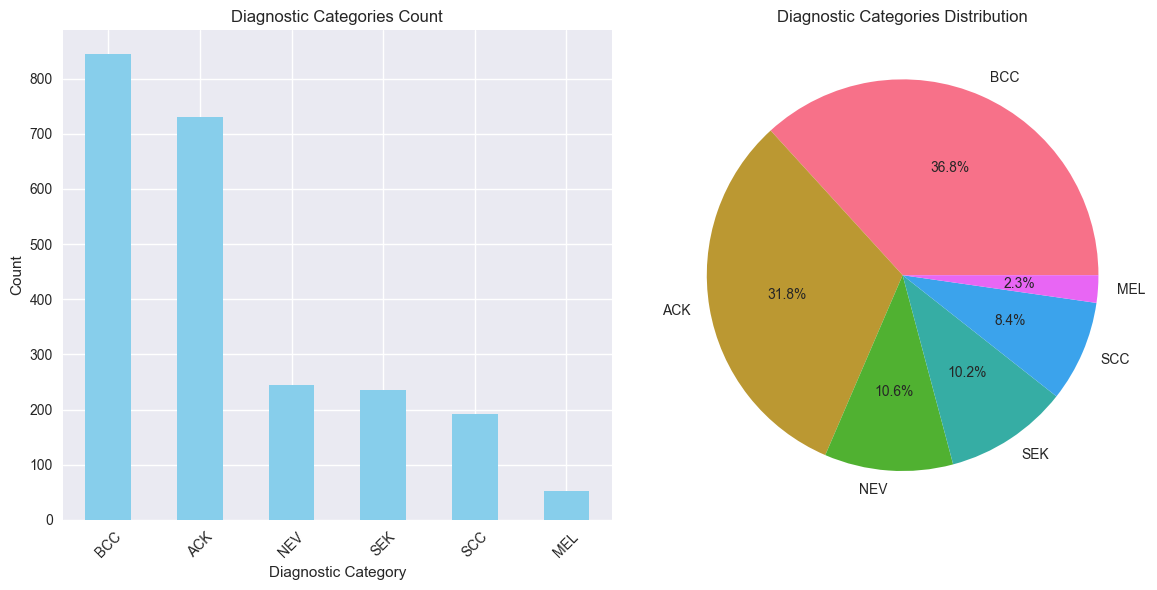

In [7]:
diagnostic_counts = df['diagnostic'].value_counts()
print(diagnostic_counts)

# Calculate percentages
diagnostic_percent = (diagnostic_counts / len(df)) * 100
print(f"Diagnostic categories percentages:")
for category, count in diagnostic_counts.items():
    print(f"{category}: {count} ({diagnostic_percent[category]:.1f}%)")

# Visualize diagnostic distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
diagnostic_counts.plot(kind='bar', color='skyblue')
plt.title('Diagnostic Categories Count')
plt.xlabel('Diagnostic Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(diagnostic_counts.values, labels=diagnostic_counts.index, autopct='%1.1f%%')
plt.title('Diagnostic Categories Distribution')

plt.tight_layout()
plt.show()


Patient Demographics Analysis:


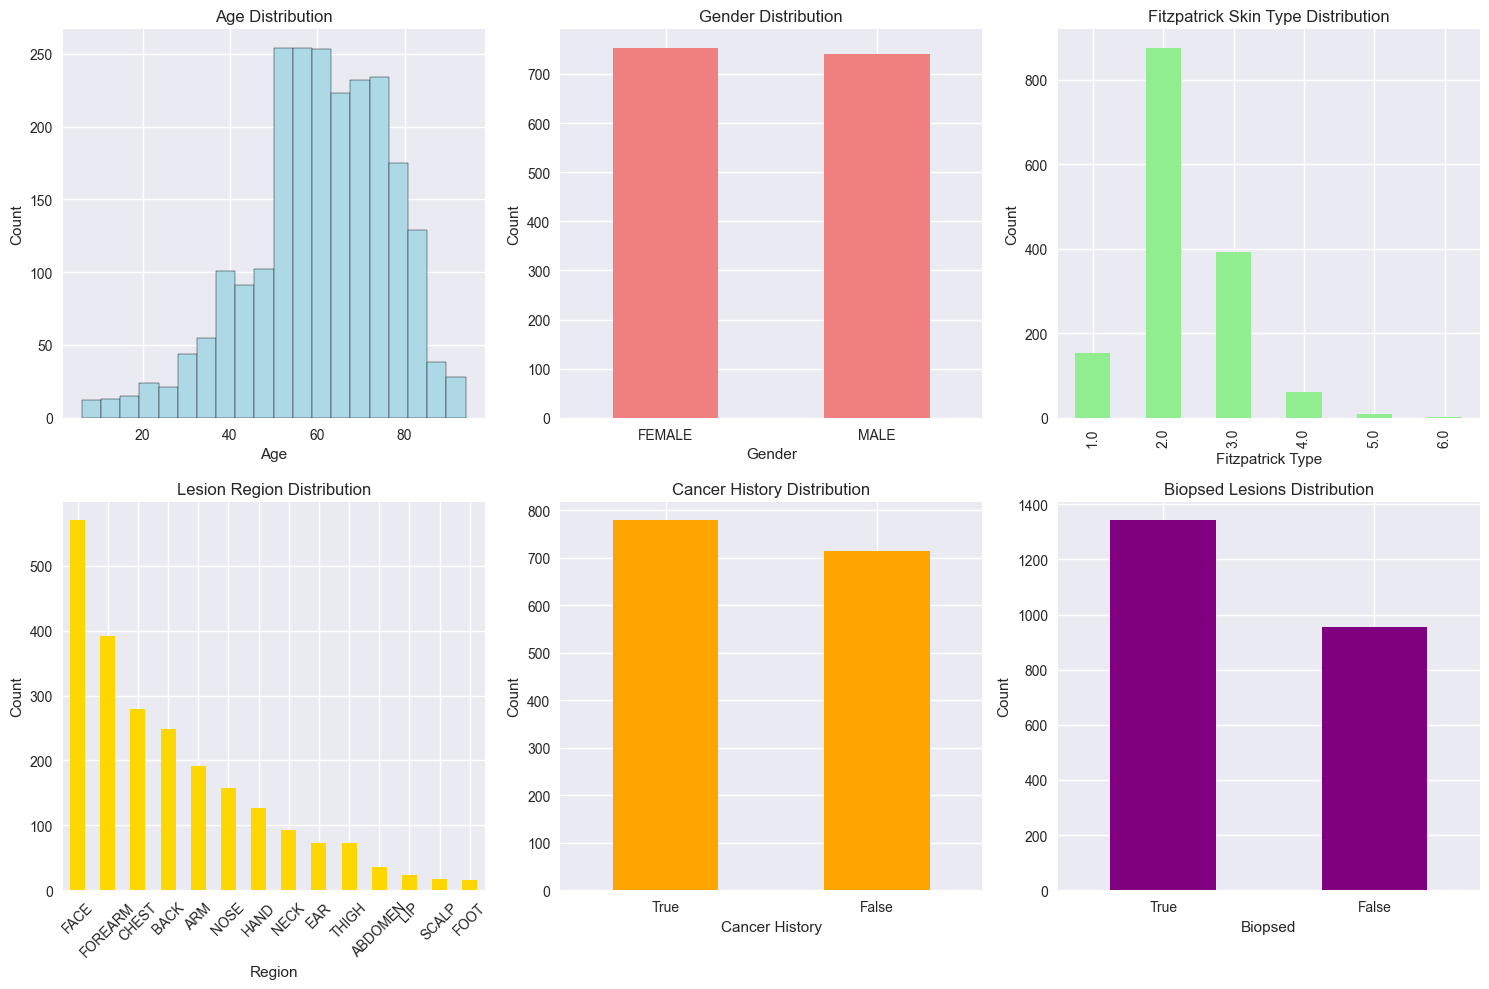

Age range: 6 - 94 years
Average age: 60.5 years
Gender distribution: {'FEMALE': np.int64(753), 'MALE': np.int64(741)}
Fitzpatrick types: {1.0: np.int64(153), 2.0: np.int64(876), 3.0: np.int64(392), 4.0: np.int64(62), 5.0: np.int64(10), 6.0: np.int64(1)}


In [8]:
# Patient demographics analysis
print("Patient Demographics Analysis:")

# Age distribution
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df['age'].hist(bins=20, color='lightblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Gender distribution
plt.subplot(2, 3, 2)
gender_counts = df['gender'].value_counts()
gender_counts.plot(kind='bar', color='lightcoral')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Fitzpatrick skin type distribution
plt.subplot(2, 3, 3)
fitzpatrick_counts = df['fitspatrick'].value_counts().sort_index()
fitzpatrick_counts.plot(kind='bar', color='lightgreen')
plt.title('Fitzpatrick Skin Type Distribution')
plt.xlabel('Fitzpatrick Type')
plt.ylabel('Count')

# Lesion location distribution
plt.subplot(2, 3, 4)
region_counts = df['region'].value_counts()
region_counts.plot(kind='bar', color='gold')
plt.title('Lesion Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Cancer history
plt.subplot(2, 3, 5)
cancer_history = df['cancer_history'].value_counts()
cancer_history.plot(kind='bar', color='orange')
plt.title('Cancer History Distribution')
plt.xlabel('Cancer History')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Biopsed lesions
plt.subplot(2, 3, 6)
biopsed_counts = df['biopsed'].value_counts()
biopsed_counts.plot(kind='bar', color='purple')
plt.title('Biopsed Lesions Distribution')
plt.xlabel('Biopsed')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Print key statistics
print(f"Age range: {df['age'].min()} - {df['age'].max()} years")
print(f"Average age: {df['age'].mean():.1f} years")
print(f"Gender distribution: {dict(gender_counts)}")
print(f"Fitzpatrick types: {dict(fitzpatrick_counts)}")


Symptom Analysis:


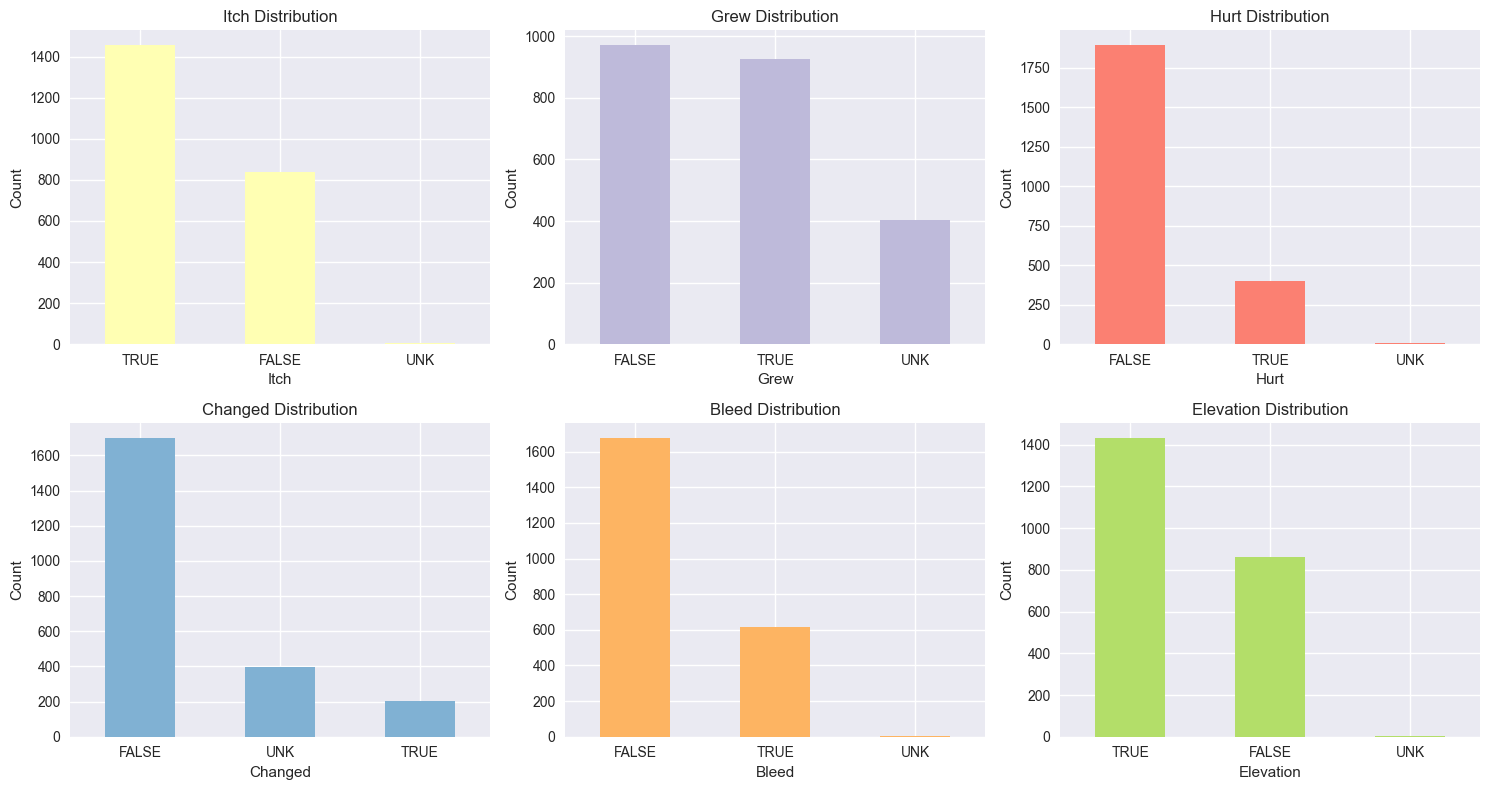


Symptom prevalence:
itch: True=0, False=0, Unknown=6
grew: True=0, False=0, Unknown=402
hurt: True=0, False=0, Unknown=10
changed: True=0, False=0, Unknown=396
bleed: True=0, False=0, Unknown=6
elevation: True=0, False=0, Unknown=2


In [9]:
# Symptom analysis
print("Symptom Analysis:")

symptoms = ['itch', 'grew', 'hurt', 'changed', 'bleed', 'elevation']
symptom_data = df[symptoms].apply(pd.Series.value_counts)

plt.figure(figsize=(15, 8))
for i, symptom in enumerate(symptoms, 1):
    plt.subplot(2, 3, i)
    symptom_counts = df[symptom].value_counts()
    symptom_counts.plot(kind='bar', color=plt.cm.Set3(i))
    plt.title(f'{symptom.capitalize()} Distribution')
    plt.xlabel(symptom.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Calculate symptom statistics
print("\nSymptom prevalence:")
for symptom in symptoms:
    true_count = (df[symptom] == True).sum()
    false_count = (df[symptom] == False).sum()
    unk_count = (df[symptom] == 'UNK').sum() if 'UNK' in df[symptom].values else 0
    print(f"{symptom}: True={true_count}, False={false_count}, Unknown={unk_count}")


In [10]:
# Image analysis - check image availability and properties
print("Image Analysis:")

def check_images_in_directory(directory):
    """Check images in a specific directory"""
    if os.path.exists(directory):
        image_files = [f for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        return len(image_files), image_files[:5]  # Return count and first 5 filenames
    return 0, []

# Check all image directories
total_images = 0
for part, dir_path in IMAGE_DIRS.items():
    full_path = os.path.join(BASE_DIR, dir_path)
    count, sample_files = check_images_in_directory(full_path)
    total_images += count
    print(f"{part}: {count} images found")
    if sample_files:
        print(f"Sample files: {sample_files}")

print(f"Total images across all parts: {total_images}")

# Check if metadata images exist in directories
print("Checking image-metadata correspondence:")
metadata_images = set(df['img_id'].tolist())
print(f"Images in metadata: {len(metadata_images)}")

# Sample a few images to check their properties
sample_img_ids = df['img_id'].head(3).tolist()
print(f"Sample image analysis:")
for img_id in sample_img_ids:
    found = False
    for part, dir_path in IMAGE_DIRS.items():
        full_path = os.path.join(BASE_DIR, dir_path, img_id)
        if os.path.exists(full_path):
            try:
                img = Image.open(full_path)
                print(f"{img_id}: Found in {part}, Size: {img.size}, Mode: {img.mode}")
                found = True
                break
            except Exception as e:
                print(f"{img_id}: Error loading from {part}: {e}")
    if not found:
        print(f"{img_id}: Not found in any directory")


Image Analysis:
part1: 911 images found
Sample files: ['PAT_100_393_595.png', 'PAT_100_393_898.png', 'PAT_101_1041_651.png', 'PAT_101_1041_658.png', 'PAT_101_1041_898.png']
part2: 659 images found
Sample files: ['PAT_1000_31_620.png', 'PAT_1006_53_385.png', 'PAT_1006_53_716.png', 'PAT_1008_59_297.png', 'PAT_1013_82_876.png']
part3: 728 images found
Sample files: ['PAT_1094_381_355.png', 'PAT_1094_381_446.png', 'PAT_1094_381_85.png', 'PAT_1100_402_375.png', 'PAT_1102_408_613.png']
Total images across all parts: 2298
Checking image-metadata correspondence:
Images in metadata: 2298
Sample image analysis:
PAT_1516_1765_530.png: Found in part3, Size: (1089, 1089), Mode: RGB
PAT_46_881_939.png: Found in part1, Size: (1325, 1325), Mode: RGBA
PAT_1545_1867_547.png: Found in part3, Size: (640, 640), Mode: RGB


Sample Images from Different Diagnostic Categories:


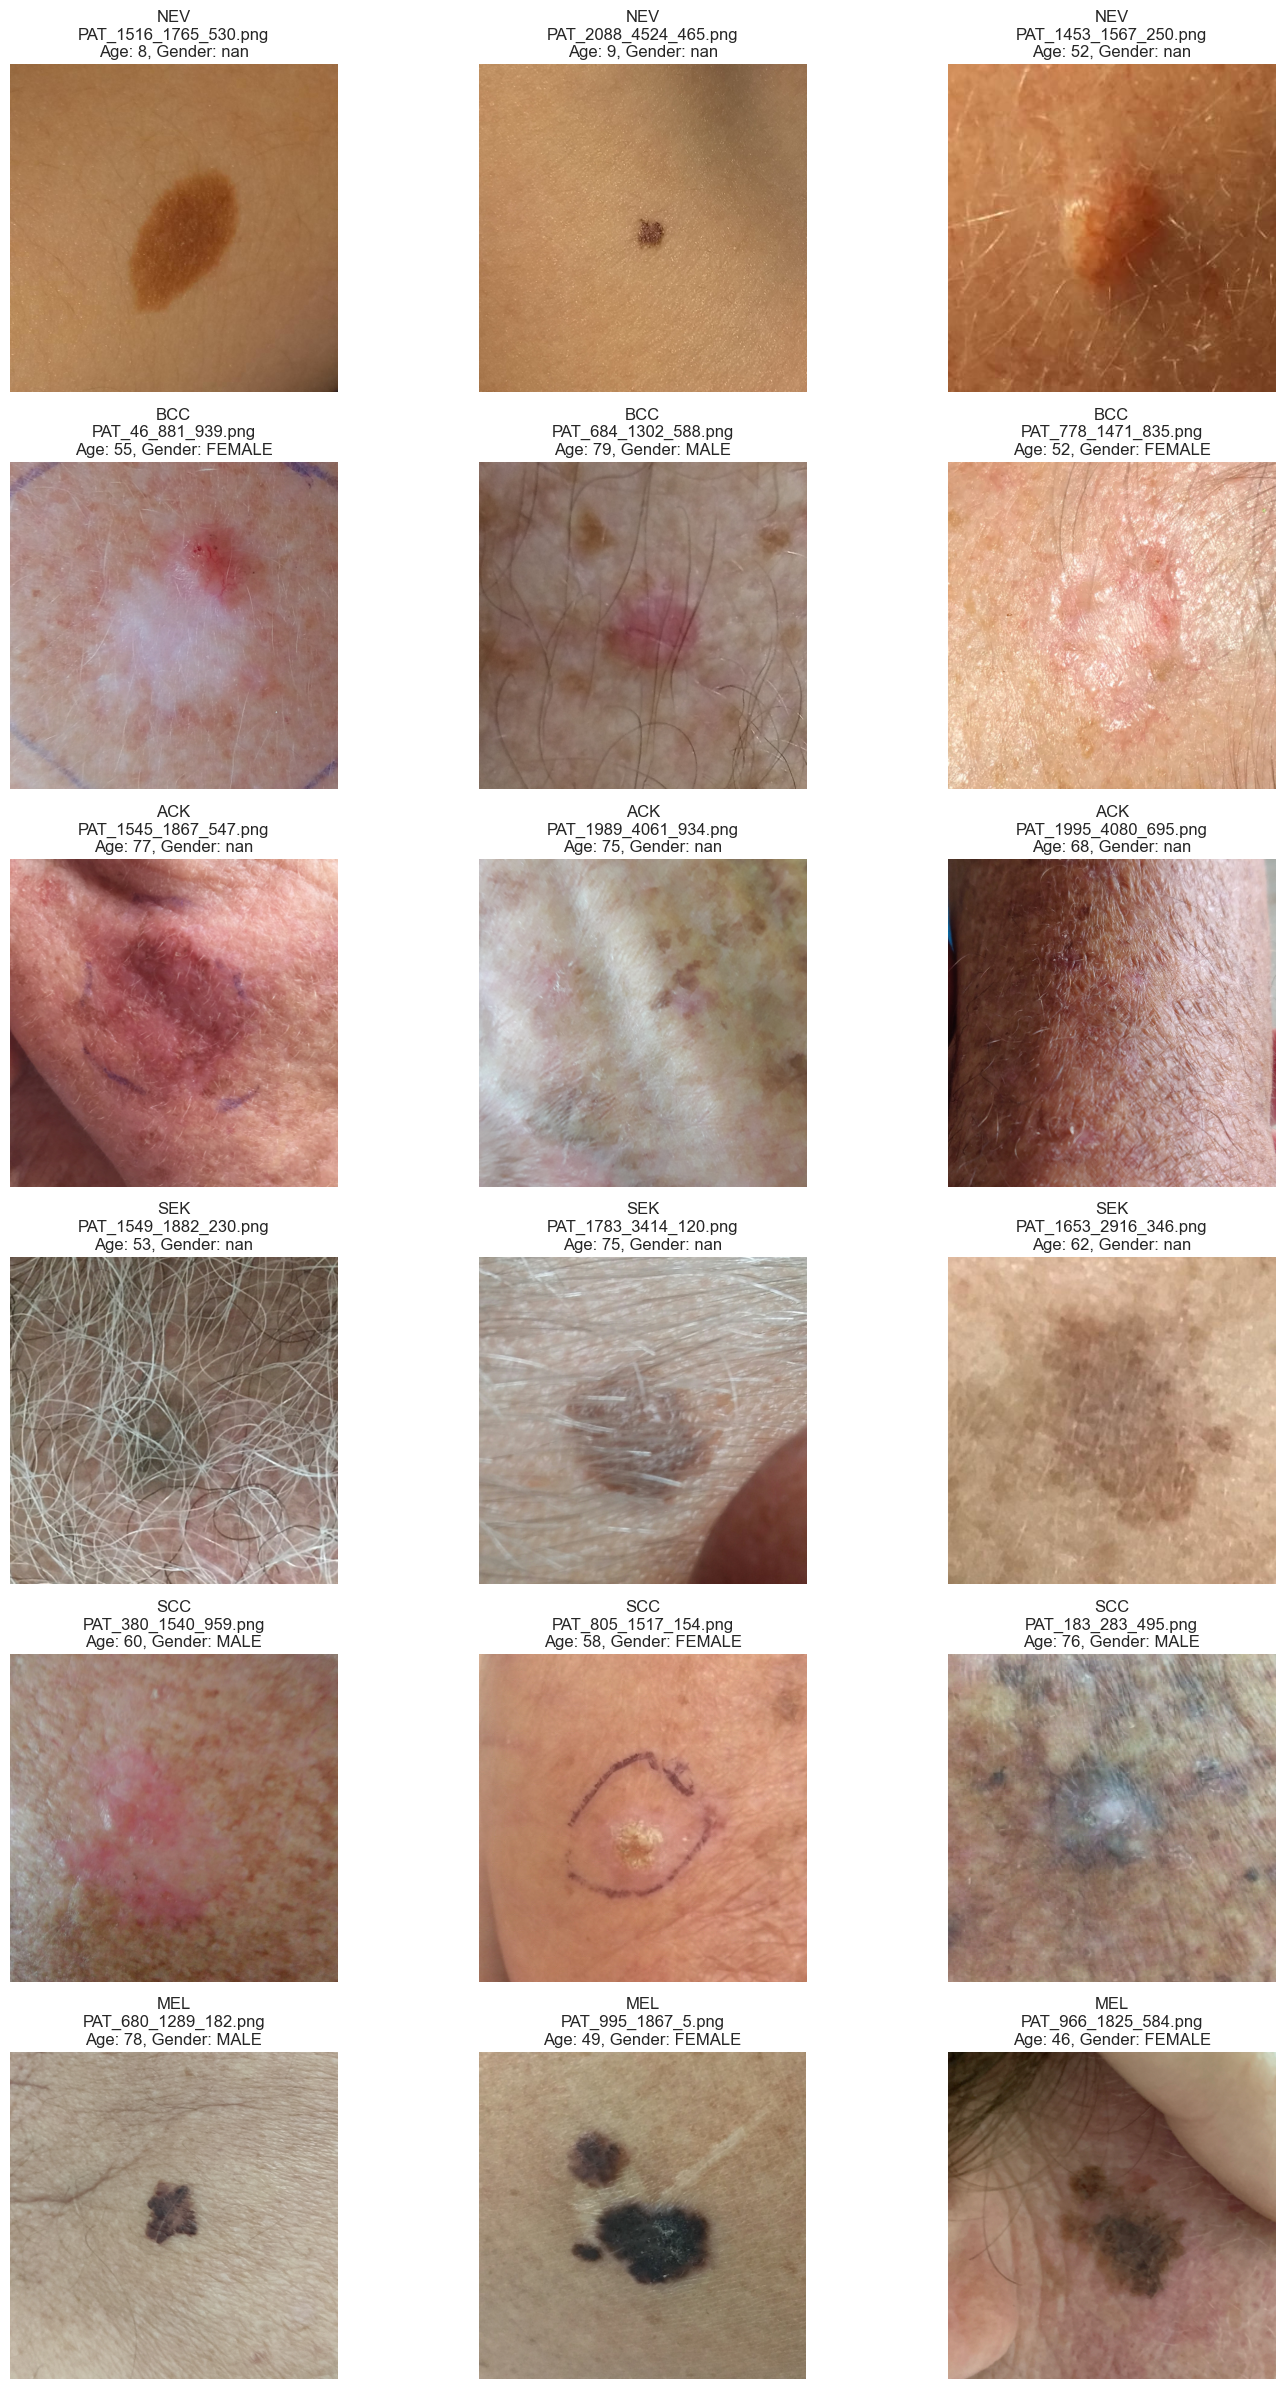

In [11]:
# Visualize sample images from different diagnostic categories
print("Sample Images from Different Diagnostic Categories:")

def display_sample_images(df, num_samples=3):
    """Display sample images from each diagnostic category"""
    fig, axes = plt.subplots(len(df['diagnostic'].unique()), num_samples, 
                            figsize=(15, 4 * len(df['diagnostic'].unique())))
    
    if len(df['diagnostic'].unique()) == 1:
        axes = axes.reshape(1, -1)
    
    for i, diagnostic in enumerate(df['diagnostic'].unique()):
        diagnostic_samples = df[df['diagnostic'] == diagnostic].head(num_samples)
        
        for j, (_, row) in enumerate(diagnostic_samples.iterrows()):
            img_id = row['img_id']
            img_found = False
            
            # Try to find the image in any directory
            for part, dir_path in IMAGE_DIRS.items():
                full_path = os.path.join(BASE_DIR, dir_path, img_id)
                if os.path.exists(full_path):
                    try:
                        img = Image.open(full_path)
                        axes[i, j].imshow(img)
                        axes[i, j].set_title(f'{diagnostic}\n{img_id}\nAge: {row["age"]}, Gender: {row["gender"]}')
                        axes[i, j].axis('off')
                        img_found = True
                        break
                    except Exception as e:
                        continue
            
            if not img_found:
                axes[i, j].text(0.5, 0.5, f'Image not found:\n{img_id}', 
                              ha='center', va='center', transform=axes[i, j].transAxes)
                axes[i, j].set_title(f'{diagnostic}\n{img_id}')
                axes[i, j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Display sample images
display_sample_images(df, num_samples=3)


In [12]:
# Data quality and completeness analysis
print("Data Quality Analysis:")

# Check for data inconsistencies
print("Data Quality Issues:")
print(f"Duplicate image IDs: {df['img_id'].duplicated().sum()}")
print(f"Duplicate lesion IDs: {df['lesion_id'].duplicated().sum()}")
print(f"Patients with multiple lesions: {df.groupby('patient_id')['lesion_id'].nunique().max()}")

# Analyze lesion dimensions
print(f"Lesion Dimensions:")
print(f"Diameter 1 - Min: {df['diameter_1'].min()}, Max: {df['diameter_1'].max()}, Mean: {df['diameter_1'].mean():.1f}")
print(f"Diameter 2 - Min: {df['diameter_2'].min()}, Max: {df['diameter_2'].max()}, Mean: {df['diameter_2'].mean():.1f}")

# Check for missing critical information
critical_fields = ['diagnostic', 'age', 'gender', 'img_id']
missing_critical = df[critical_fields].isnull().sum()
print(f"\nMissing critical fields: {dict(missing_critical)}")

# Analyze diagnostic distribution by demographics
print(f"Diagnostic distribution by gender:")
diagnostic_gender = pd.crosstab(df['diagnostic'], df['gender'], margins=True)
print(diagnostic_gender)

print(f"Diagnostic distribution by age groups:")
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 70, 100], labels=['0-30', '31-50', '51-70', '70+'])
diagnostic_age = pd.crosstab(df['diagnostic'], df['age_group'], margins=True)
print(diagnostic_age)


Data Quality Analysis:
Data Quality Issues:
Duplicate image IDs: 0
Duplicate lesion IDs: 657
Patients with multiple lesions: 8
Lesion Dimensions:
Diameter 1 - Min: 0.0, Max: 100.0, Mean: 11.9
Diameter 2 - Min: 0.0, Max: 70.0, Mean: 8.9

Missing critical fields: {'diagnostic': np.int64(0), 'age': np.int64(0), 'gender': np.int64(804), 'img_id': np.int64(0)}
Diagnostic distribution by gender:
gender      FEMALE  MALE   All
diagnostic                    
ACK            153   130   283
BCC            406   439   845
MEL             28    24    52
NEV             49    26    75
SCC             90   102   192
SEK             27    20    47
All            753   741  1494
Diagnostic distribution by age groups:
age_group   0-30  31-50  51-70  70+   All
diagnostic                               
ACK            1    146    376  207   730
BCC            5    130    429  281   845
MEL            2     11     29   10    52
NEV           90    100     51    3   244
SCC            0     15     94   83  

In [13]:
# Summary
print("Key Findings:")
print(f"• Dataset contains {len(df)} samples with {df['diagnostic'].nunique()} diagnostic categories")
print(f"• Image distribution: {total_images} total images across 3 parts")
print(f"• Most common diagnosis: {diagnostic_counts.index[0]} ({diagnostic_percent.iloc[0]:.1f}%)")
print(f"• Age range: {df['age'].min()}-{df['age'].max()} years, mean: {df['age'].mean():.1f}")
print(f"• Gender distribution: {dict(gender_counts)}")

print("Data Quality Issues Identified:")
missing_issues = missing_df[missing_df['Missing %'] > 0]
if len(missing_issues) > 0:
    print("• Missing data in several fields:")
    for field, row in missing_issues.iterrows():
        print(f"  - {field}: {row['Missing %']:.1f}% missing")
else:
    print("No significant missing data issues")

Key Findings:
• Dataset contains 2298 samples with 6 diagnostic categories
• Image distribution: 2298 total images across 3 parts
• Most common diagnosis: BCC (36.8%)
• Age range: 6-94 years, mean: 60.5
• Gender distribution: {'FEMALE': np.int64(753), 'MALE': np.int64(741)}
Data Quality Issues Identified:
• Missing data in several fields:
  - background_mother: 35.8% missing
  - background_father: 35.6% missing
  - pesticide: 35.0% missing
  - gender: 35.0% missing
  - drink: 35.0% missing
  - smoke: 35.0% missing
  - skin_cancer_history: 35.0% missing
  - has_sewage_system: 35.0% missing
  - has_piped_water: 35.0% missing
  - cancer_history: 35.0% missing
  - diameter_1: 35.0% missing
  - diameter_2: 35.0% missing
  - fitspatrick: 35.0% missing
